In [ ]:
# Esse estudo analisa as avaliações (de 1 a 5) e a quantidade de avaliações por gênero de jogos na Steam. 
# O dataset usado contém informações sobre diversos jogos, incluindo o número total de avaliações e a média de notas por gênero, como ação, aventura, RPG, entre outros.
# A ideia principal é entender como os diferentes gêneros se comparam em relação às notas médias dadas pelos jogadores. 
# Ou seja, o estudo busca descobrir quais gêneros recebem melhores avaliações e se existe alguma diferença significativa entre eles. 
# Também se observa o número de avaliações por gênero para ver quais tipos de jogos têm mais interações dos usuários e quais têm menos feedback.
# A análise é feita com o auxílio de gráficos e estatísticas, ajudando a identificar padrões, como a relação entre a popularidade do jogo, o número de avaliações e a média das notas. 
# A ideia é verificar se gêneros mais populares, como ação e simulação, acabam recebendo mais avaliações, mas com variações nas notas.
# No final, o estudo ajuda a entender melhor como a comunidade da Steam vê jogos de diferentes gêneros, trazendo insights importantes tanto para desenvolvedores quanto para quem está interessado nas preferências dos jogadores.

In [ ]:
# Organização da Análise Exploratória de Dados (EDA)

# Objetivo:
# O objetivo principal é analisar as avaliações (de 1 a 5) e a quantidade de avaliações por gênero de jogos na Steam.
# Busca-se entender como os diferentes gêneros se comparam em relação às notas médias dadas pelos jogadores e identificar padrões de popularidade e qualidade.

# Contexto Comercial:
# A análise é relevante para desenvolvedores de jogos e empresas do setor, pois fornece insights sobre as preferências dos jogadores.
# Isso pode ajudar na tomada de decisões estratégicas, como o desenvolvimento de novos jogos ou o aprimoramento de gêneros específicos.

# Problema Comercial:
# Quais gêneros de jogos são mais populares e quais recebem as melhores avaliações? Existe uma relação entre popularidade e qualidade?
# Como identificar gêneros com alta qualidade, mas baixa popularidade, para explorar oportunidades de mercado?

# Contexto Analítico:
# A análise utiliza um dataset contendo informações sobre jogos da Steam, incluindo número total de avaliações, média de notas e gêneros.
# Técnicas de agrupamento, cálculo de correlações e visualizações gráficas foram aplicadas para explorar os dados.

# Insights da Análise Exploratória de Dados (EDA):
# 1. O gênero mais popular (com mais avaliações) é: 'Acción'.
# 2. O gênero com a melhor avaliação média é: 'Acceso anticipado'.
# 3. A correlação entre popularidade (número de avaliações) e qualidade (média das avaliações) é: -0.02, indicando uma relação muito fraca.
# 4. Gêneros com baixa popularidade, mas alta qualidade:
#    - Estrategia
#    - Acceso anticipado
#    - Desarrollo de juegos
#    - Utilidades

In [1]:
import pandas as pd

# Carregar o dataset
df_games = pd.read_csv('./dataset/data/steam_games.csv') # substitua com o caminho do seu arquivo

# Verificar os valores distintos na coluna 'genero'
generos_distintos = df_games['genre'].unique()

# Exibir os valores distintos
print(generos_distintos)

['Carreras' 'Acción' 'Rol' 'Indie' 'Free to Play' 'Casual' 'Aventura'
 'Simuladores' 'Multijugador masivo' 'Estrategia' 'Acceso anticipado'
 'Diseño e ilustración' 'Desarrollo de juegos' 'Deportes' 'Utilidades'
 'Producción de audio' 'Animación y modelado' 'Educación'
 'Producción de vídeo']


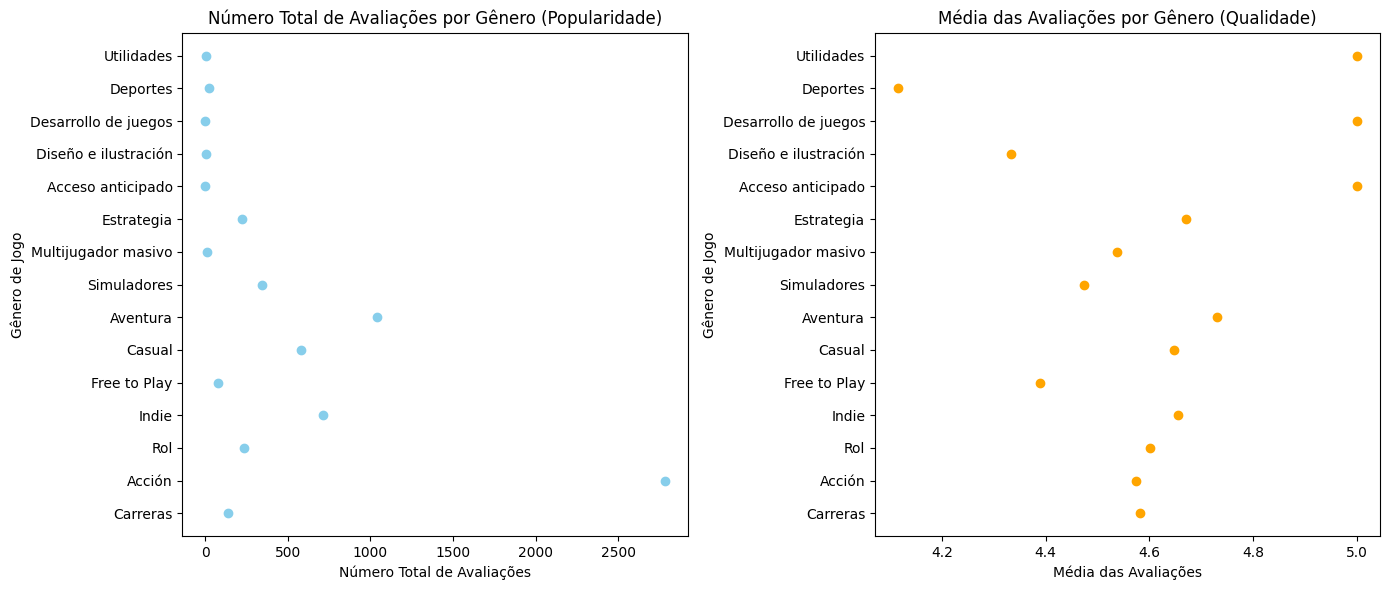

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./dataset/data/steam_games.csv')

# Verificar se as colunas relevantes existem e lidar com valores ausentes
df_games['recent_reviews'] = df_games['recent_reviews'].fillna('')  # Garantir que as avaliações ausentes sejam tratadas
df_games['genre'] = df_games['genre'].fillna('Unknown')  # Garantir que gêneros ausentes não causem problemas

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
}

# Substituir as avaliações de texto por valores numéricos usando o mapeamento
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Filtrar as linhas com avaliações válidas (não None)
df_games_valid_reviews = df_games.dropna(subset=['review_score'])

# Calcular a quantidade total de avaliações e a média das avaliações por gênero
df_reviews_by_genre = df_games_valid_reviews.groupby('genre').agg(
    total_reviews=('review_score', 'count'),   # Número total de avaliações
    average_review=('review_score', 'mean')    # Média das avaliações
)

# Lista dos gêneros
genres = ['Carreras', 'Acción', 'Rol', 'Indie', 'Free to Play', 'Casual', 'Aventura',
          'Simuladores', 'Multijugador masivo', 'Estrategia', 'Acceso anticipado',
          'Diseño e ilustración', 'Desarrollo de juegos', 'Deportes', 'Utilidades']

# Filtrar os dados apenas para os gêneros relevantes
df_reviews_by_genre = df_reviews_by_genre.loc[genres]

# Criar os gráficos de dispersão
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Quantidade de avaliações por gênero (popularidade)
axes[0].scatter(df_reviews_by_genre['total_reviews'], df_reviews_by_genre.index, color='skyblue')
axes[0].set_title('Número Total de Avaliações por Gênero (Popularidade)')
axes[0].set_xlabel('Número Total de Avaliações')
axes[0].set_ylabel('Gênero de Jogo')

# Gráfico 2: Média das avaliações por gênero (qualidade)
axes[1].scatter(df_reviews_by_genre['average_review'], df_reviews_by_genre.index, color='orange')
axes[1].set_title('Média das Avaliações por Gênero (Qualidade)')
axes[1].set_xlabel('Média das Avaliações')
axes[1].set_ylabel('Gênero de Jogo')

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()




In [16]:
# Insight 1: Gêneros mais populares
genero_mais_popular = df_reviews_by_genre['total_reviews'].idxmax()
print(f"O gênero mais popular (com mais avaliações) é: {genero_mais_popular}")

# Insight 2: Gêneros com melhor avaliação média
genero_melhor_avaliado = df_reviews_by_genre['average_review'].idxmax()
print(f"O gênero com a melhor avaliação média é: {genero_melhor_avaliado}")

# Insight 3: Relação entre popularidade e qualidade
correlacao = df_reviews_by_genre['total_reviews'].corr(df_reviews_by_genre['average_review'])
print(f"A correlação entre popularidade (número de avaliações) e qualidade (média das avaliações) é: {correlacao:.2f}")

# Insight 4: Gêneros com baixa popularidade, mas alta qualidade
generos_baixa_popularidade_alta_qualidade = df_reviews_by_genre[
    (df_reviews_by_genre['total_reviews'] < df_reviews_by_genre['total_reviews'].mean()) &
    (df_reviews_by_genre['average_review'] > df_reviews_by_genre['average_review'].mean())
]
print("Gêneros com baixa popularidade, mas alta qualidade:")
print(generos_baixa_popularidade_alta_qualidade)

O gênero mais popular (com mais avaliações) é: Acción
O gênero com a melhor avaliação média é: Acceso anticipado
A correlação entre popularidade (número de avaliações) e qualidade (média das avaliações) é: -0.02
Gêneros com baixa popularidade, mas alta qualidade:
                      total_reviews  average_review
genre                                              
Estrategia                      222        4.671171
Acceso anticipado                 1        5.000000
Desarrollo de juegos              1        5.000000
Utilidades                        3        5.000000


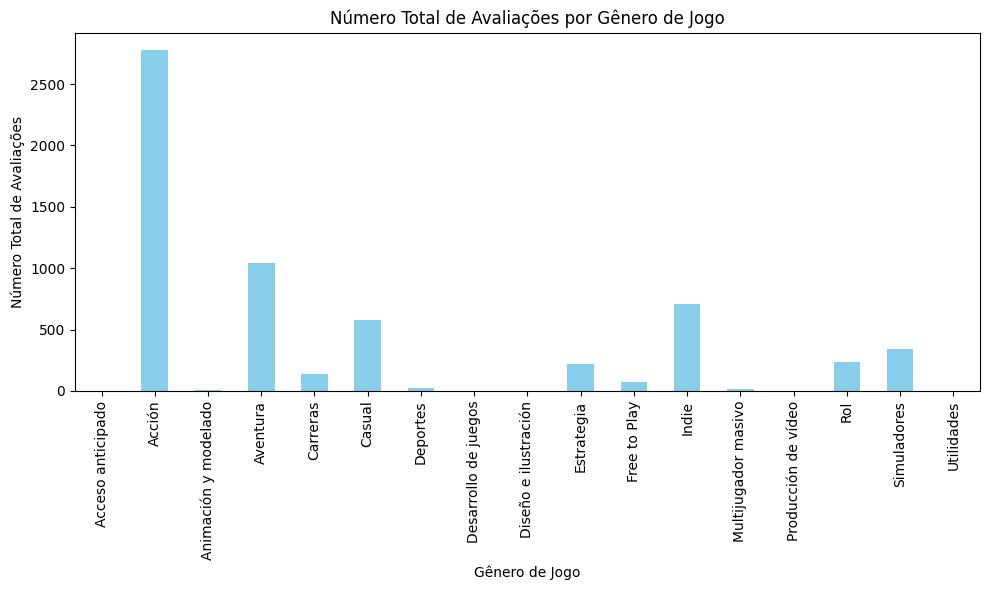

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./dataset/data/steam_games.csv')

# Verificar se as colunas relevantes existem e lidar com valores ausentes
df_games['recent_reviews'] = df_games['recent_reviews'].fillna('')  # Garantir que as avaliações ausentes sejam tratadas
df_games['genre'] = df_games['genre'].fillna('Unknown')  # Garantir que gêneros ausentes não causem problemas

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
}

# Substituir as avaliações de texto por valores numéricos usando o mapeamento
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Filtrar as linhas com avaliações válidas (não None)
df_games_valid_reviews = df_games.dropna(subset=['review_score'])

# Contar o número total de avaliações por gênero
df_reviews_by_genre = df_games_valid_reviews.groupby('genre')['review_score'].count()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
df_reviews_by_genre.plot(kind='bar', color='skyblue')
plt.title('Número Total de Avaliações por Gênero de Jogo')
plt.xlabel('Gênero de Jogo')
plt.ylabel('Número Total de Avaliações')
plt.xticks(rotation=90)  # Rotacionar os nomes dos gêneros para melhor visualização
plt.tight_layout()
plt.show()


In [17]:
# Insight: Identificar gêneros com alta qualidade e baixa popularidade
generos_qualidade_popularidade = df_reviews_by_genre[
    (df_reviews_by_genre['average_review'] > df_reviews_by_genre['average_review'].mean()) &
    (df_reviews_by_genre['total_reviews'] < df_reviews_by_genre['total_reviews'].mean())
]

print("Gêneros com alta qualidade (média de avaliações acima da média) e baixa popularidade (número de avaliações abaixo da média):")
print(generos_qualidade_popularidade)

Gêneros com alta qualidade (média de avaliações acima da média) e baixa popularidade (número de avaliações abaixo da média):
                      total_reviews  average_review
genre                                              
Estrategia                      222        4.671171
Acceso anticipado                 1        5.000000
Desarrollo de juegos              1        5.000000
Utilidades                        3        5.000000


In [ ]:
# Propostas de Modelos de Resolução

# 1. Modelo de Identificação de Oportunidades de Mercado
#    - Desenvolver um modelo que identifique gêneros com alta qualidade, mas baixa popularidade, para explorar oportunidades de mercado.
#    - Utilizar análise de dados e técnicas de otimização para sugerir estratégias de marketing ou desenvolvimento.

# 2. Modelo de Recomendação de Gêneros de Jogos
#    - Baseado nas avaliações médias e na popularidade, criar um sistema de recomendação que sugira gêneros de jogos para jogadores.
#    - Utilizar técnicas de filtragem colaborativa ou baseada em conteúdo.

# 3. Modelo de Previsão de Popularidade
#    - Desenvolver um modelo de machine learning para prever a popularidade de novos jogos com base em características como gênero, preço, e avaliações recentes.
#    - Algoritmos sugeridos: Regressão Linear, Random Forest, ou Gradient Boosting.

# 4. Análise de Cluster para Segmentação de Gêneros
#    - Aplicar técnicas de clustering (como K-Means ou DBSCAN) para agrupar gêneros de jogos com características semelhantes.
#    - Isso pode ajudar a identificar padrões ocultos e criar estratégias específicas para cada cluster.


# 5. Modelo de Previsão de Notas Finais
#    - Criar um modelo preditivo para estimar a nota final de um jogo com base em suas características iniciais e avaliações recentes.
#    - Algoritmos sugeridos: Regressão Linear, XGBoost, ou Redes Neurais.
